### THIS IS THE PARTITIONING AROUND MEDOIDS (PAM) IMPLEMENTATION OF K-MEDOIDS 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
X = np.array([[2,6], [7,3], [3,8], [3,4], [6,2], [6,4], [4,7], [7,4], [8,5], [7,6]])#the wikipedia example has been used 

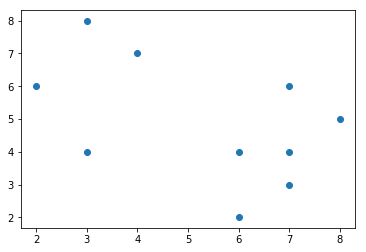

In [166]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [167]:
class K_Medoids_pam:
    def __init__(self, k=2, max_iter=5):
        self.k = k
        self.max_iter = max_iter
    def fit(self, data):
        self.means = []
        for i in range(self.k):
            self.means.append(data[i])
        clusters = []
        new_clusters = []
        for i in range(self.k):
            clusters.append([])
        #initially, divide the data points into clusters 
        cost = 0
        new_cost = 0
        for point in data:
            dist = [np.abs(point - m).sum() for m in self.means]
            min_dist = min(dist)
            index_ = dist.index(min_dist)
            clusters[index_].append(point)
            cost = cost+min_dist
        for i in range(self.k):
            new_clusters.append([])
        self.labels = []
        for it in range(self.max_iter):
            change = False
            for i in range(self.k):
                val = self.means[i]
                flag = False
                for j in data:
                    self.means[i] = j#swapped 1 medoid 
                    for point in data:
                        dist = [np.abs(point - m).sum() for m in self.means]
                        min_dist = min(dist)
                        index_ = dist.index(min_dist)
                        new_clusters[index_].append(point)
                        new_cost = cost+min_dist
                    if new_cost > cost:
                        self.means[i] = val
                    else:
                        clusters = []
                        for i in range(len(new_clusters)):
                            clusters.append(new_clusters[i])
                        flag = True
                        change = True
                        cost = new_cost
                        break
            if not change:
                break
        self.labels = self.predict(data)           
    def predict(self, test_data):
        cluster_pred = []
        for point in test_data:
            dist = [np.abs(point - m).sum() for m in self.means]
            min_dist = min(dist)
            index_ = dist.index(min_dist)
            cluster_pred.append(index_)
        return cluster_pred

In [168]:
b = K_Medoids_pam()
b.k

2

In [169]:
b.fit(X)

In [170]:
b.predict(X)

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0]

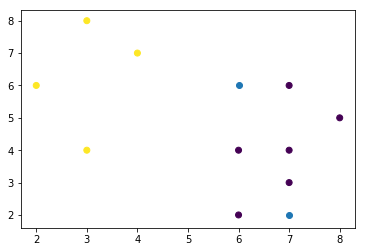

In [171]:
label = np.array(b.labels)
plt.scatter(X[:,0], X[:,1], c=label)
plt.scatter(b.means[:][0], b.means[:][1])
plt.show()